# 👋 Welcome to Nillion's Nada AI spam detection example

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/NillionNetwork/nada-ai/blob/main/examples/spam_detection/spam_detection.ipynb)

This notebook will get you familiar with spam detection in `nada-ai`, Nillion's AI/ML framework on top of the Nada dsl

We are really excited for developers to build with our SDK, if you have any questions please do reach out to us on:

[![Discord](https://img.shields.io/badge/Discord-nillionnetwork-%235865F2?logo=discord)](https://discord.gg/nillionnetwork)
[![GitHub Discussions](https://img.shields.io/badge/GitHub_Discussions-NillionNetwork-%23181717?logo=github)](https://github.com/orgs/NillionNetwork/discussions)

# 1. Set up environment

The boring part!

Installs all required dependencies and spins up a local devnet that will run Nada programs

In [1]:
%pip install nada-ai~=0.3.0 --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 998.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.1/413.1 kB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 71.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.3/149.3 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 70.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 re

In [2]:
import os
import time
import sys

In [3]:
# Configure telemetry settings
enable_telemetry = True  #@param {type:"boolean"}
my_identifier = "your-telemetry-identifier"  #@param {type:"string"}

In [4]:
# Install the nilup tool and then use that to install the Nillion SDK
!curl https://nilup.nilogy.xyz/install.sh | bash

# Update Path if ran in colab
if "google.colab" in sys.modules:
    os.environ["PATH"] += ":/root/.nilup/bin"
    os.environ["PATH"] += ":/root/.nilup/sdks/latest/"

# Set telemetry if opted in
if enable_telemetry:
    identifier = "nada-ai-spam-detection" + my_identifier
    !echo 'yes' | nilup instrumentation enable --wallet {identifier}

# Install the lastest SDK and initialise it
!nilup init
!nilup install latest
!nilup use latest

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  7810  100  7810    0     0  11236      0 --:--:-- --:--:-- --:--:-- 11237

nilup has been installed into /root/.nilup/bin and added to your $PATH in /root/.bashrc.

Run 'source /root/.bashrc' or start a new terminal session to use nilup.

By providing your Ethereum wallet address, you consent to the collection of telemetry data by the Nillion Network.
That includes but is not limited to
- The version of the SDK you are using
- The OS you are using
- The Processor Architecture you are using
- The SDK binary that you are running and the subcommand
- The wallet address you provided
- The errors produced by the SDK
We collect this data to understand how the software is used, and to better assist you in case of issues.
While we will not collect any personal information, we still recommend using a new wallet address that cannot be 

In [5]:
# Spin up local Nillion devnet
!nohup nillion-devnet &

time.sleep(20)  # Wait for devnet

nohup: appending output to 'nohup.out'


In [6]:
if 'google.colab' in sys.modules:
  # If ran in Colab, clone the nada-ai repo and navigate to the correct directory
  if not os.path.exists("nada-ai"):
    !git clone https://github.com/NillionNetwork/nada-ai.git
  os.chdir("nada-ai/examples/spam_detection")

Cloning into 'nada-ai'...
remote: Enumerating objects: 1483, done.
remote: Counting objects: 100% (280/280), done.
remote: Compressing objects: 100% (212/212), done.
remote: Total 1483 (delta 94), reused 115 (delta 53), pack-reused 1203
Receiving objects: 100% (1483/1483), 1.51 MiB | 10.11 MiB/s, done.
Resolving deltas: 100% (855/855), done.


# 2. Build Nada program

We will now build the Nada program specified under `src/spam_detection.py`

You will see that it uses both our `nada-dsl` and `nada-ai`.

In [7]:
!nada build

Building program: spam_detection
Build complete!


In [8]:
# You will see that the program was compiled in a .nada.bin file
!ls target | grep spam_detection

spam_detection.nada.bin


# 3. (optional) Test Nada program

This step is optional but we can now test whether our newly compiled program behaves as expected!

Under `tests/spam_detection.yaml`, you will see a test file with provided inputs and expected outputs. We will now test whether if we provide the program with those inputs, the program returns the expected outputs or not.

*Note for the nerds: nada testing runs programs on a simulator instead of a network. This means that you can test programs without having a local devnet running!!*

In [9]:
!nada test

Running test: spam_detection
Building ...
Running ...
spam_detection: PASS



# 4. Provide model

In this example, there are two separate parties that collaborate:
- A model provider party that has a model and provides the weights of that model as secrets to the spam detection Nada program.
- A model user party that has some input data (e.g. an email) and provides that input to the spam detection Nada program so that it can run inference on it.

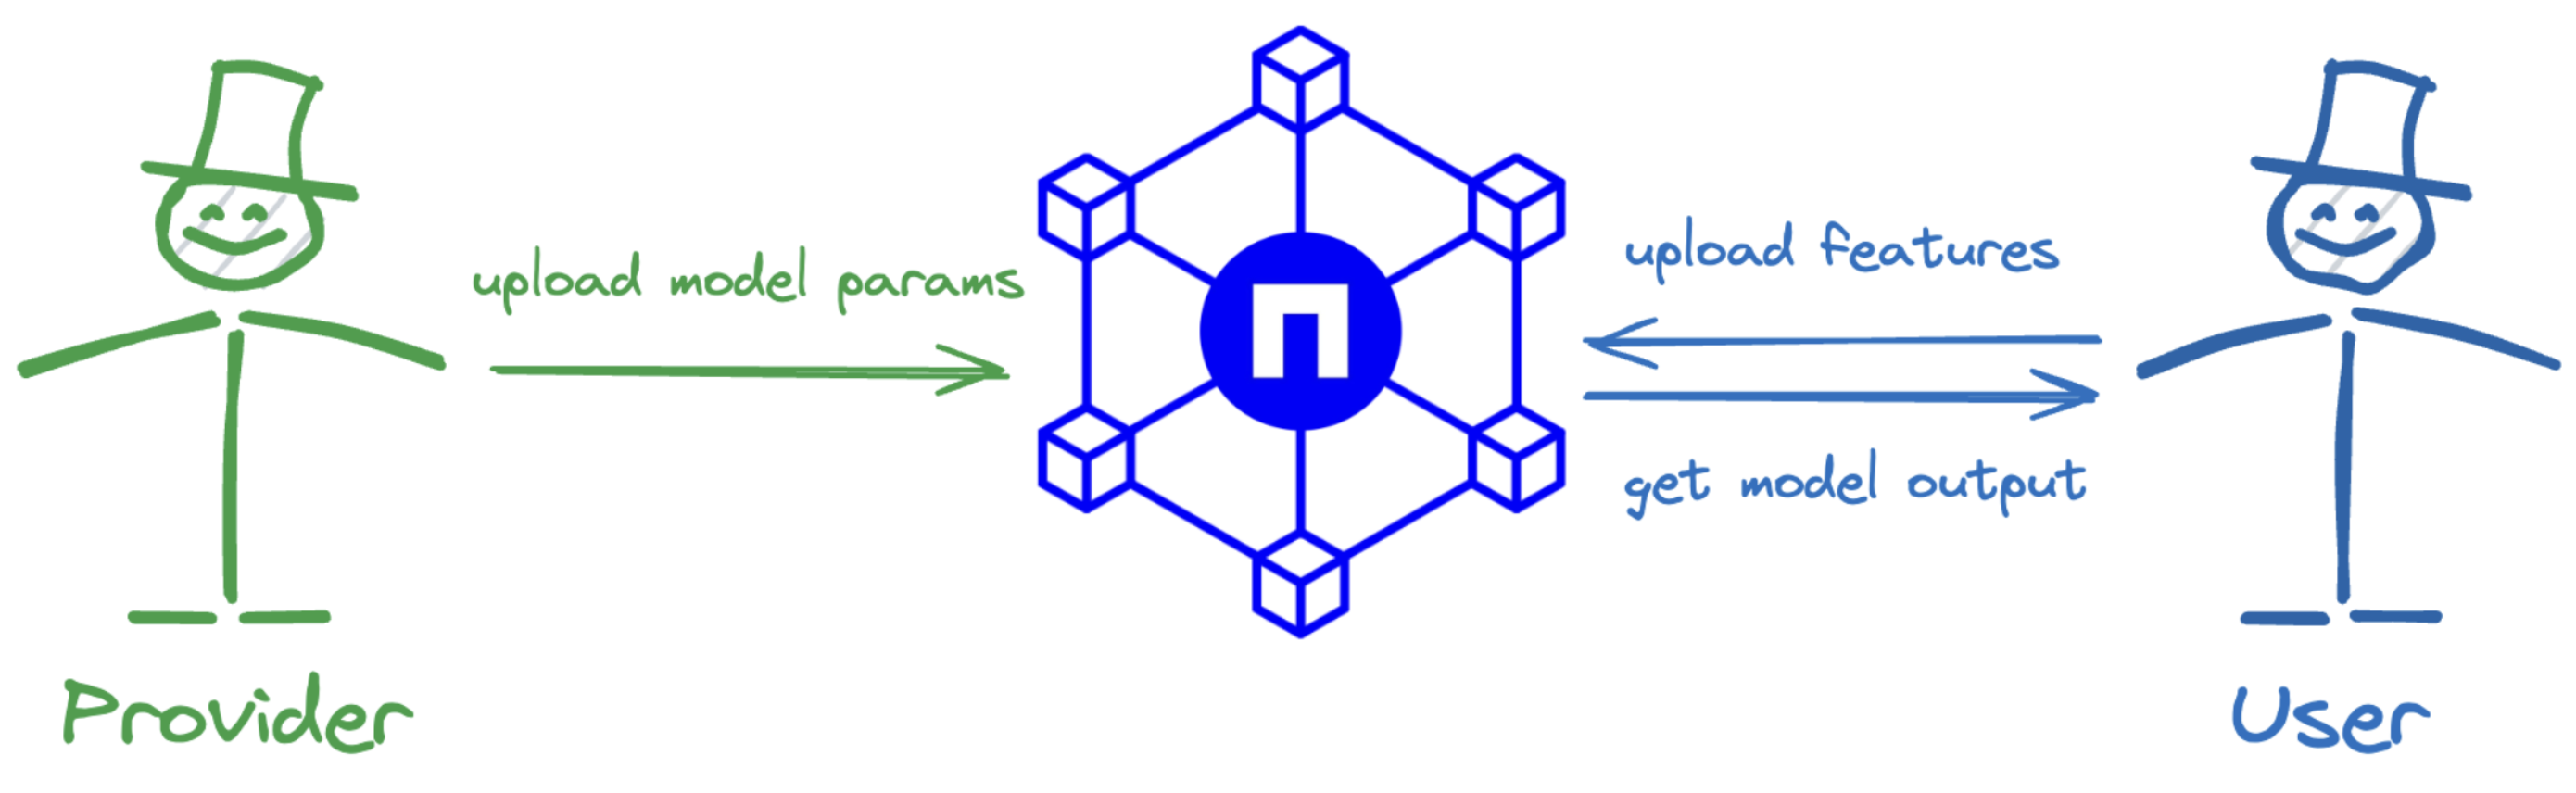

Let's step into the shoes of the model provider.

We will train a spam detection model and upload the weights as secrets.

In [10]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

import zipfile

import joblib
import pandas as pd
import numpy as np

import requests

from dotenv import load_dotenv
from io import BytesIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from config import DIM

home = os.getenv("HOME")
load_dotenv(f"{home}/.config/nillion/nillion-devnet.env")

True

In [11]:
# Load the SMS Spam Collection Dataset
response = requests.get(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip"
)
if response.status_code != 200:
    raise FileNotFoundError

zip_content = BytesIO(response.content)
with zipfile.ZipFile(zip_content, "r") as zip_ref:
    if "SMSSpamCollection" not in zip_ref.namelist():
        raise FileNotFoundError

    with zip_ref.open("SMSSpamCollection", "r") as csv_file:
        df = pd.read_csv(csv_file, sep="\t", header=None, names=["label", "message"])

In [12]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# Split data into features and labels
X = df["message"]
y = df["label"]

# Convert labels to binary (1 for spam, 0 for ham)
y = y.map({"spam": 1, "ham": 0})

In [14]:
# Transform text to set of numerical features
vectorizer = TfidfVectorizer(
    max_features=DIM
)  # Limiting to fixed set of features
X = vectorizer.fit_transform(X)

# Save the vectorizer to a file
joblib.dump(vectorizer, "model/vectorizer.joblib")

['model/vectorizer.joblib']

In [15]:
# Train classifier model
classifier = LogisticRegression()
classifier.fit(X, y)

LogisticRegression()

In [16]:
# Predict labels for test set
y_pred = classifier.predict(X)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred)

print("Accuracy: {:.4f}%".format(accuracy * 100))

Accuracy: 98.2053%


In [17]:
print("Optimal regression coefficients are:", classifier.coef_.shape)
print("Optimal bias is:", classifier.intercept_.shape)

Optimal regression coefficients are: (1, 500)
Optimal bias is: (1,)


In [18]:
# Save the classifier to a file
joblib.dump(classifier, "model/classifier.joblib")

['model/classifier.joblib']

In [19]:
!python 01_provide_model.py \
    --model-path model/classifier.joblib \
    --out-path target/identifiers.json

Storing program...
Getting quote for operation...
Submitting payment receipt 2 unil, tx hash 753A4AA16CF0F9048F3D5C5A537632BD892EDE9CBA688D3E91A5C3AD68CDB633
Stored program. action_id: 3rgqxWd47e171EUwe4RXP9hm45tmoXfuF8fC52S7jcFoQTnU8wPiL7hqWzyV1muak6bEg7iWhudwg4t2pM9XnXcp/spam_detection
Stored program_id: 3rgqxWd47e171EUwe4RXP9hm45tmoXfuF8fC52S7jcFoQTnU8wPiL7hqWzyV1muak6bEg7iWhudwg4t2pM9XnXcp/spam_detection
Program stored successfully!
Storing model...
Getting quote for operation...
Quote cost is 48098 unil
Submitting payment receipt 48098 unil, tx hash 9A3179C46A0BAB9B96B1E7CFF0B1E606F419847275B39415F65AB527A4357C42
Model stored successfully!


# 5. Provide input and run inference

Now that the model has been provided, we can step into the shoes of the model user.

We will provide an input to the program and run the model on it.

In [20]:
vectorizer: TfidfVectorizer = joblib.load("model/vectorizer.joblib")

In [21]:
# Let's find out whether it's a billion dollar opportunity or pyramid scheme
INPUT_DATA = "Free entry in 2 a wkly comp to win exclusive prizes! Text WIN to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

[features] = vectorizer.transform([INPUT_DATA]).toarray().tolist()

In [22]:
features = np.array(features).astype(float)
np.save("model/features.npy", features)

In [23]:
!python 02_run_inference.py \
    --features-path model/features.npy \
    --in-path target/identifiers.json

Storing input data...
Getting quote for operation...
Quote cost is 48002 unil
Submitting payment receipt 48002 unil, tx hash 91347B3DF897B83C50AC02C14CD8DA916DA3CC82FA0B35ED7554CD22C2099C1C
Input data stored successfully!
Getting quote for operation...
Quote cost is 1004 unil
Submitting payment receipt 1004 unil, tx hash 4E5564F5085DE9B849D96525C73C59EC5E15ADC49F58E8E0788D4EC72524B750
✅ Compute complete for compute_id becb60e3-3190-4059-9c3a-1a9885a40f89
🖥️  The result is {'logit_0': 157897}
Computed logit is 2.4093170166015625
Which corresponds to probability 0.9175350190040187


In [24]:
# Let's sense-check these results versus what we would have gotten in plain-text
vectorizer: TfidfVectorizer = joblib.load("model/vectorizer.joblib")
classifier: LogisticRegression = joblib.load("model/classifier.joblib")
features = vectorizer.transform([INPUT_DATA]).toarray().tolist()

[logit_plain_text] = classifier.decision_function(features)
print("Logit in plain text: {}".format(logit_plain_text))

output_probability_plain_text = classifier.predict_proba(features)[0][1]
print(
    "Probability of spam in plain text: {:.6f}%".format(
        output_probability_plain_text * 100
    )
)

Logit in plain text: 2.4080795630742746
Probability of spam in plain text: 91.744134%


Excuse my French but voilà, we did it!!

To recap, in this example we:
- Set up and installed all necessary Nillion libraries and dependencies.
- Created and built a Nada program using Nillion's `nada-dsl` and the `nada-ai` library.
- Tested the behaviour of the Nada program.
- Trained a spam detection model and provided the model weights to the Nada program, from the perspective of a first party.
- Uploaded an email message to the Nada program and received blind inference results, from the perspective of a second party.